# New Section

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/dataset/KDDTrain+_v1.csv')

In [0]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,neptune


In [0]:
data = df

In [0]:
# create dictionary to classify DoS, Probe, U2R, R2L, or normal connection

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [0]:
data['number'] = range(1, len(df) + 1)

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack,number
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal,1
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos,2
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal,3
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal,4
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos,5


In [0]:
# dos_sorted = sort_dos[dataset2.type_attack == 'dos']
dos_only = data[data.type_attack == 'dos']

In [0]:
dos_only.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack,number
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.0,0.0,1.0,1.0,0.0,0.0,19,dos,2
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.0,255,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,21,dos,5
5,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.0,255,9,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,21,dos,6
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.0,255,15,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,21,dos,7
7,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.0,255,23,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,21,dos,8


In [0]:
duration = dos_only['duration']

In [0]:
attack_dos = dos_only['type_attack']

In [0]:
# data['number'] = range(1, len(df) + 1)


In [0]:
number = dos_only['number']

In [0]:
data_dos = pd.concat([duration, attack_dos, number], axis=1)

In [0]:
data_dos.head()

,duration,type_attack,number
1,0,dos,2
4,0,dos,5
5,0,dos,6
6,0,dos,7
7,0,dos,8


In [0]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [0]:
# histogram dos
# data.hist(column='duration')


In [0]:
x1 = data.loc[data.type_attack=='normal','duration']
x2 = data.loc[data.type_attack=='dos','duration']
x3 = data.loc[data.type_attack=='probe','duration']
x4 = data.loc[data.type_attack=='u2r','duration']
x5 = data.loc[data.type_attack=='r2l','duration']

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

([array([6.6419e+04, 4.2800e+02, 3.0100e+02, 1.3500e+02, 3.5000e+01,
         1.1000e+01, 9.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00]),
  array([45927.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([45927.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([10703.,    87.,    91.,   110.,    87.,    87.,    89.,    98.,
           118.,   186.]),
  array([52.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([904.,  69.,  12.,  10.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([    0. ,  4290.8,  8581.6, 12872.4, 17163.2, 21454. , 25744.8,
        30035.6, 34326.4, 38617.2, 42908. ]),
 <a list of 6 Lists of Patches objects>)

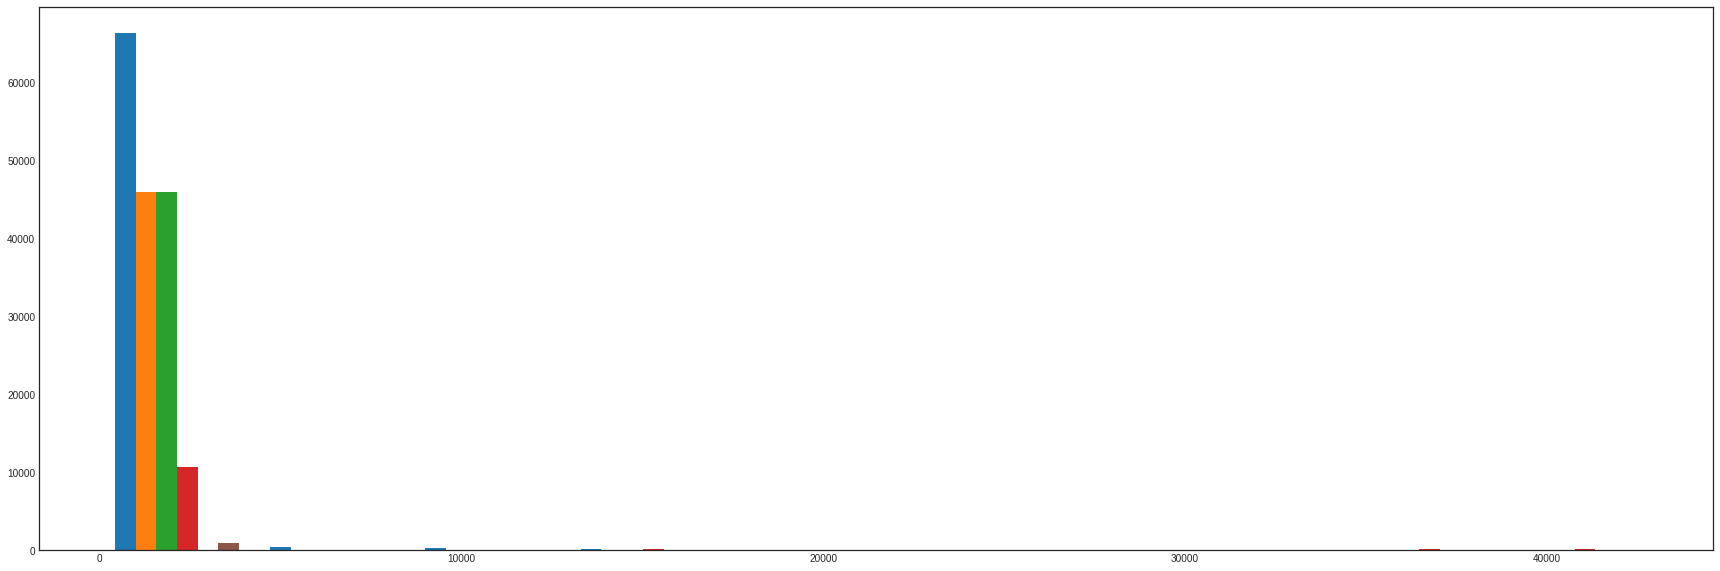

In [0]:
# histogram all
x = [x1,x2,x2,x3,x4,x5]

plt.figure(figsize=(30,10))

plt.hist(x, bins = 10)


In [0]:
# da.hist(column='x1')

In [0]:
# normal
normal_only = data[data.type_attack == 'normal']
# normal_only.head()

number_normal = normal_only['number']
duration_normal = normal_only['duration']
attack_normal = normal_only['type_attack']

data_normal = pd.concat([number_normal, duration_normal, attack_normal], axis = 1)
data_normal.head()

,number,duration,type_attack
0,1,0,normal
2,3,0,normal
3,4,0,normal
11,12,0,normal
15,16,0,normal


In [0]:
dos_only = data[data.type_attack == 'dos']
# dos_only.head()

number_dos = dos_only['number']
duration_dos = dos_only['duration']
attack_dos = dos_only['type_attack']

data_dos = pd.concat([number_dos, duration_dos, attack_dos], axis = 1)
data_dos.shape

(45927, 3)

In [0]:
probe_only = data[data.type_attack == 'probe']


number_probe = probe_only['number']
duration_probe = probe_only['duration']
attack_probe = probe_only['type_attack']

data_probe = pd.concat([number_probe, duration_probe, attack_probe], axis = 1)
data_probe.head()

,number,duration,type_attack
16,17,0,probe
29,30,0,probe
32,33,0,probe
55,56,0,probe
61,62,0,probe


In [0]:
u2r_only = data[data.type_attack == 'u2r']


number_u2r = u2r_only['number']
duration_u2r = u2r_only['duration']
attack_u2r = u2r_only['type_attack']

data_u2r = pd.concat([number_u2r, duration_u2r, attack_u2r], axis = 1)
data_u2r.head()

,number,duration,type_attack
3172,3173,98,u2r
5578,5579,0,u2r
5830,5831,0,u2r
8674,8675,179,u2r
11447,11448,708,u2r


In [0]:
r2l_only = data[data.type_attack == 'r2l']


number_r2l = r2l_only['number']
duration_r2l = r2l_only['duration']
attack_r2l = r2l_only['type_attack']

data_r2l = pd.concat([number_r2l, duration_r2l, attack_r2l], axis = 1)
data_r2l.head()

,number,duration,type_attack
12,13,0,r2l
47,48,0,r2l
147,148,0,r2l
189,190,15159,r2l
221,222,4,r2l


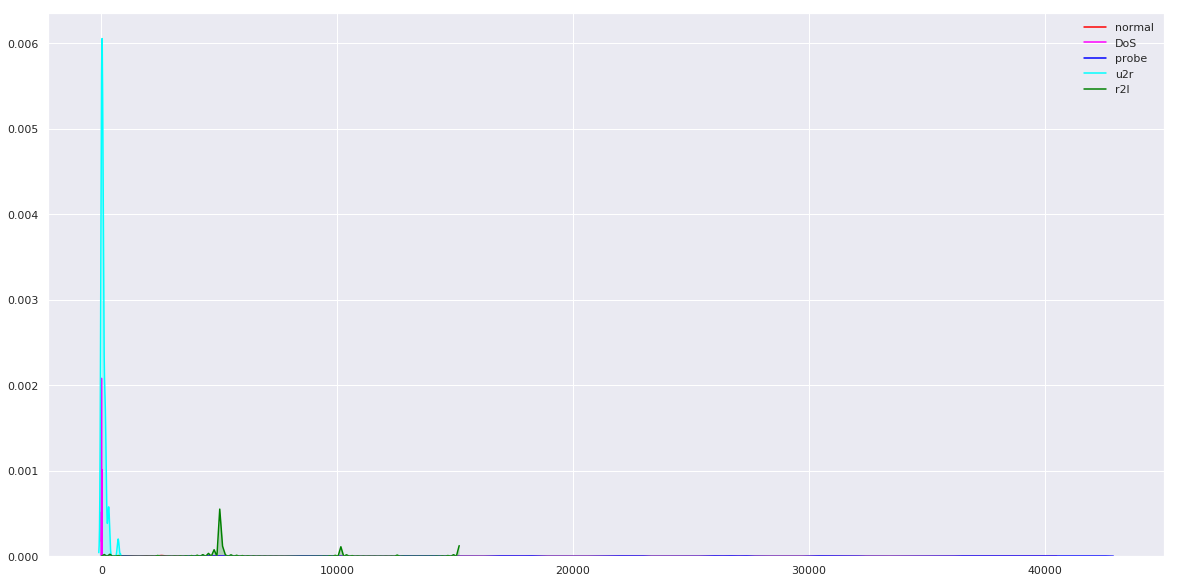

In [0]:
#plot durasi semua

sns.set(rc={'figure.figsize':(20,10)})

 
# plot of 2 variables
p1=sns.kdeplot(data_normal['duration'], shade=True, label="normal", color="red")
p1=sns.kdeplot(data_dos['duration'], shade=True, label="DoS", color="magenta")
p1=sns.kdeplot(data_probe['duration'], shade=True, label="probe", color="blue")
p1=sns.kdeplot(data_u2r['duration'], shade=True, label="u2r", color="cyan")
p1=sns.kdeplot(data_r2l['duration'], shade=True, label="r2l", color="green")



# p1=sns.kdeplot(df['sepal_length'], shade=True, color="b")


In [0]:
# normal
normal_only = data[data.type_attack == 'normal']
# normal_only.head()

number_normal = normal_only['number']
duration_normal = normal_only['duration']
attack_normal = normal_only['type_attack']
src_normal = normal_only['src_bytes']


data_normal = pd.concat([number_normal, duration_normal, attack_normal, src_normal], axis = 1)
data_normal.head()

,number,duration,type_attack,src_bytes
0,1,0,normal,146
2,3,0,normal,232
3,4,0,normal,199
11,12,0,normal,287
15,16,0,normal,300


In [0]:
dos_only = data[data.type_attack == 'dos']
# dos_only.head()

number_dos = dos_only['number']
duration_dos = dos_only['duration']
attack_dos = dos_only['type_attack']
src_dos = dos_only['src_bytes']

data_dos = pd.concat([number_dos, duration_dos, attack_dos, src_dos], axis = 1)
data_dos.head()

,number,duration,type_attack,src_bytes
1,2,0,dos,0
4,5,0,dos,0
5,6,0,dos,0
6,7,0,dos,0
7,8,0,dos,0


In [0]:
src_probe = probe_only['src_bytes']

data_probe = pd.concat([number_probe, duration_probe, attack_probe, src_probe], axis = 1)
data_probe.head()

,number,duration,type_attack,src_bytes
16,17,0,probe,18
29,30,0,probe,8
32,33,0,probe,0
55,56,0,probe,8
61,62,0,probe,0


In [0]:
src_u2r = u2r_only['src_bytes']

data_u2r = pd.concat([number_u2r, duration_u2r, attack_u2r, src_u2r], axis = 1)
# data_u2r.head()

In [0]:
src_r2l = r2l_only['src_bytes']

data_r2l = pd.concat([number_r2l, duration_r2l, attack_r2l, src_r2l], axis = 1)
# data_r2l.head()

In [0]:
# sort_by_duration_dos = data_dos.sort_values('duration',ascending=True)
# sort_by_duration_dos.tail()

In [0]:
# #plot durasi semua

# sns.set(rc={'figure.figsize':(30,10)})

 
# # plot of 2 variables
# p1=sns.kdeplot(data_dos['src_bytes'], shade=True, color="r")
# p1=sns.kdeplot(data_normal['src_bytes'], shade=True, color="blue")

In [0]:
# df = pd.DataFrame({'x':data_dos['number'],'y':data_dos['duration'],})
# ax = df.plot.kde()

# Scatter yang benar

In [0]:
sort_by_duration_dos = data_dos.sort_values('duration',ascending=True)
sort_by_duration_dos.tail()

,number,duration,type_attack,src_bytes
97224,97225,13,dos,51100
18375,18376,13,dos,54540
92184,92185,14,dos,42340
33078,33079,14,dos,54540
115017,115018,14,dos,33580


In [0]:
sort_by_duration_probe = data_probe.sort_values('duration',ascending=True)
sort_by_duration_probe.tail()

,number,duration,type_attack,src_bytes
124538,124539,42804,probe,1
66805,66806,42837,probe,1
25060,25061,42862,probe,1
105874,105875,42888,probe,1
58650,58651,42908,probe,1


In [0]:
sort_by_duration_u2r = data_u2r.sort_values('duration',ascending=True)
sort_by_duration_u2r.head()

,number,duration,type_attack,src_bytes
41715,41716,0,u2r,0
73905,73906,0,u2r,4
69941,69942,0,u2r,0
84225,84226,0,u2r,0
53300,53301,0,u2r,0


In [0]:
sort_by_duration_normal = data_normal.sort_values('duration',ascending=True)
sort_by_duration_normal.duration.unique()

array([    0,     1,     2, ..., 32527, 32637, 40504])

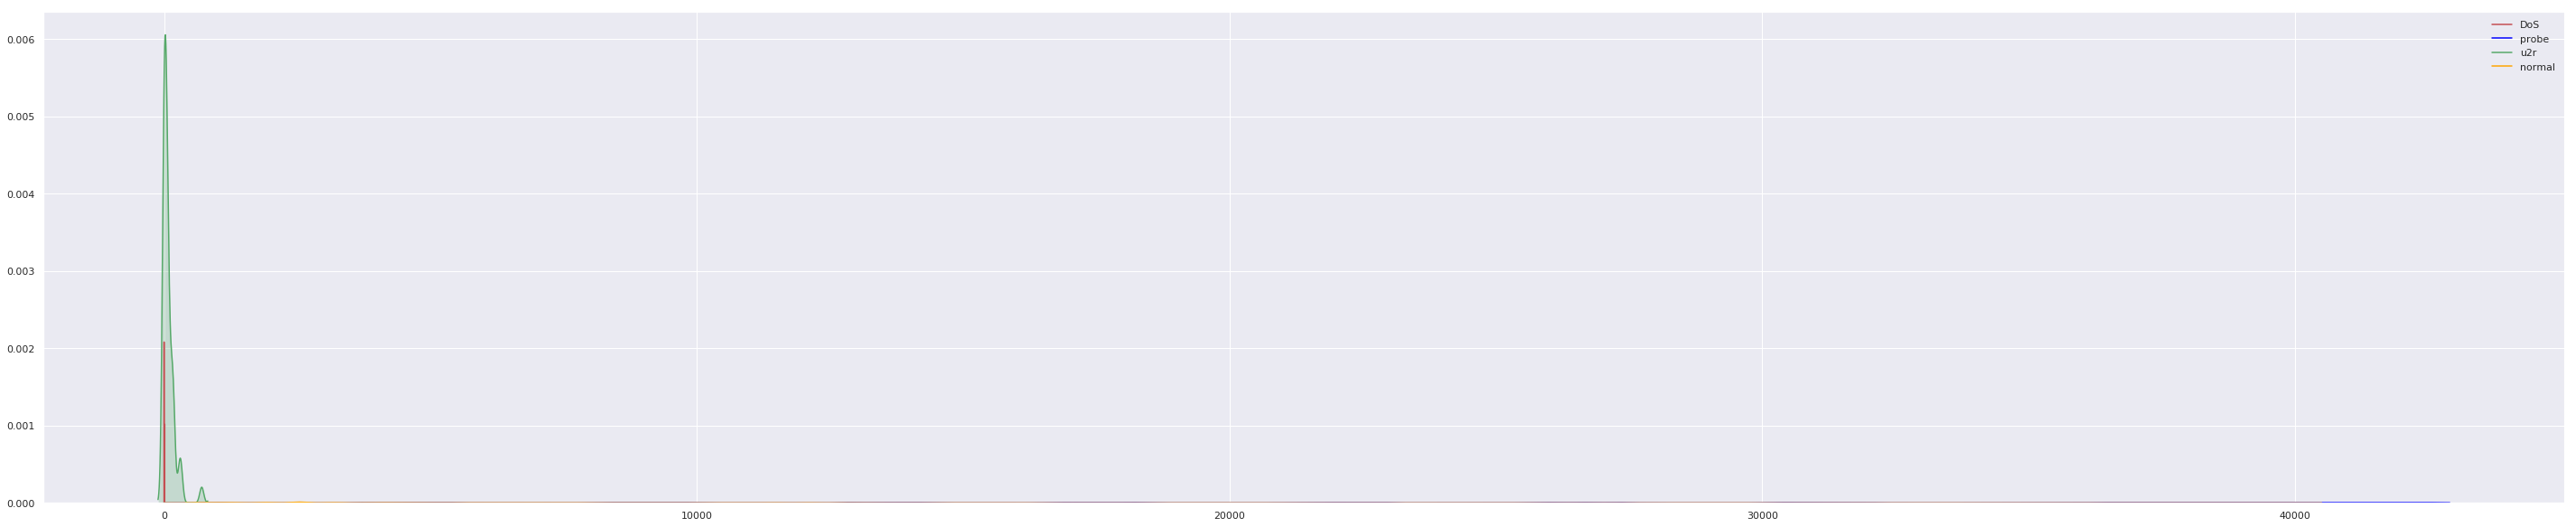

In [0]:
sns.set(rc={'figure.figsize':(50,10)})

 
# plot of 2 variables
p1=sns.kdeplot(sort_by_duration_dos['duration'], shade=True,label="DoS", color="r")
p1=sns.kdeplot(sort_by_duration_probe['duration'], shade=True,label="probe", color="blue")
p1=sns.kdeplot(sort_by_duration_u2r['duration'], shade=True,label="u2r", color="g")
p1=sns.kdeplot(sort_by_duration_normal['duration'], shade=True,label="normal", color="orange")

In [0]:
sort_by_src_normal = data_normal.sort_values('src_bytes',ascending=True)
sort_by_src_dos = data_dos.sort_values('src_bytes',ascending=True)
sort_by_src_probe = data_probe.sort_values('src_bytes',ascending=True)
sort_by_src_u2r = data_u2r.sort_values('src_bytes',ascending=True)
sort_by_src_r2l = data_r2l.sort_values('src_bytes',ascending=True)

# sort_by_src_dos.head()

In [0]:
# sns.set(rc={'figure.figsize':(30,10)})

 
# # plot of 2 variables
# p1=sns.kdeplot(sort_by_src_normal['src_bytes'], shade=True,label="normal", color="green")
# p1=sns.kdeplot(sort_by_src_dos['src_bytes'], shade=True,label="dos", color="red")

# scatter PDF

In [0]:
import scipy.stats
from scipy.stats import norm

In [0]:
df = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/dataset/KDDTrain+_v1.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,neptune


In [0]:
data = df
# data.head()

In [0]:
# create dictionary to classify DoS, Probe, U2R, R2L, or normal connection

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [0]:
data['number'] = range(1, len(df) + 1)

In [0]:
duration = data['duration']
attack = data['type_attack']
number = data['number']

In [0]:
data_all = pd.concat([duration, attack,number], axis = 1)
# data_all.head()

In [0]:
data_normal = data_all[data.type_attack == 'normal']
data_dos = data_all[data.type_attack == 'dos']
data_probe = data_all[data.type_attack == 'probe']
data_u2r = data_all[data.type_attack == 'u2r']
data_r2l = data_all[data.type_attack == 'r2l']

In [0]:
data_normal.head()

,duration,type_attack,number
0,0,normal,1
2,0,normal,3
3,0,normal,4
11,0,normal,12
15,0,normal,16


In [0]:
# sort data
sort_normal_duration = data_normal.sort_values('duration', ascending=True)
sort_dos_duration = data_dos.sort_values('duration', ascending=True)
sort_probe_duration = data_probe.sort_values('duration', ascending=True)
sort_u2r_duration = data_u2r.sort_values('duration', ascending=True)
sort_r2l_duration = data_r2l.sort_values('duration', ascending=True)

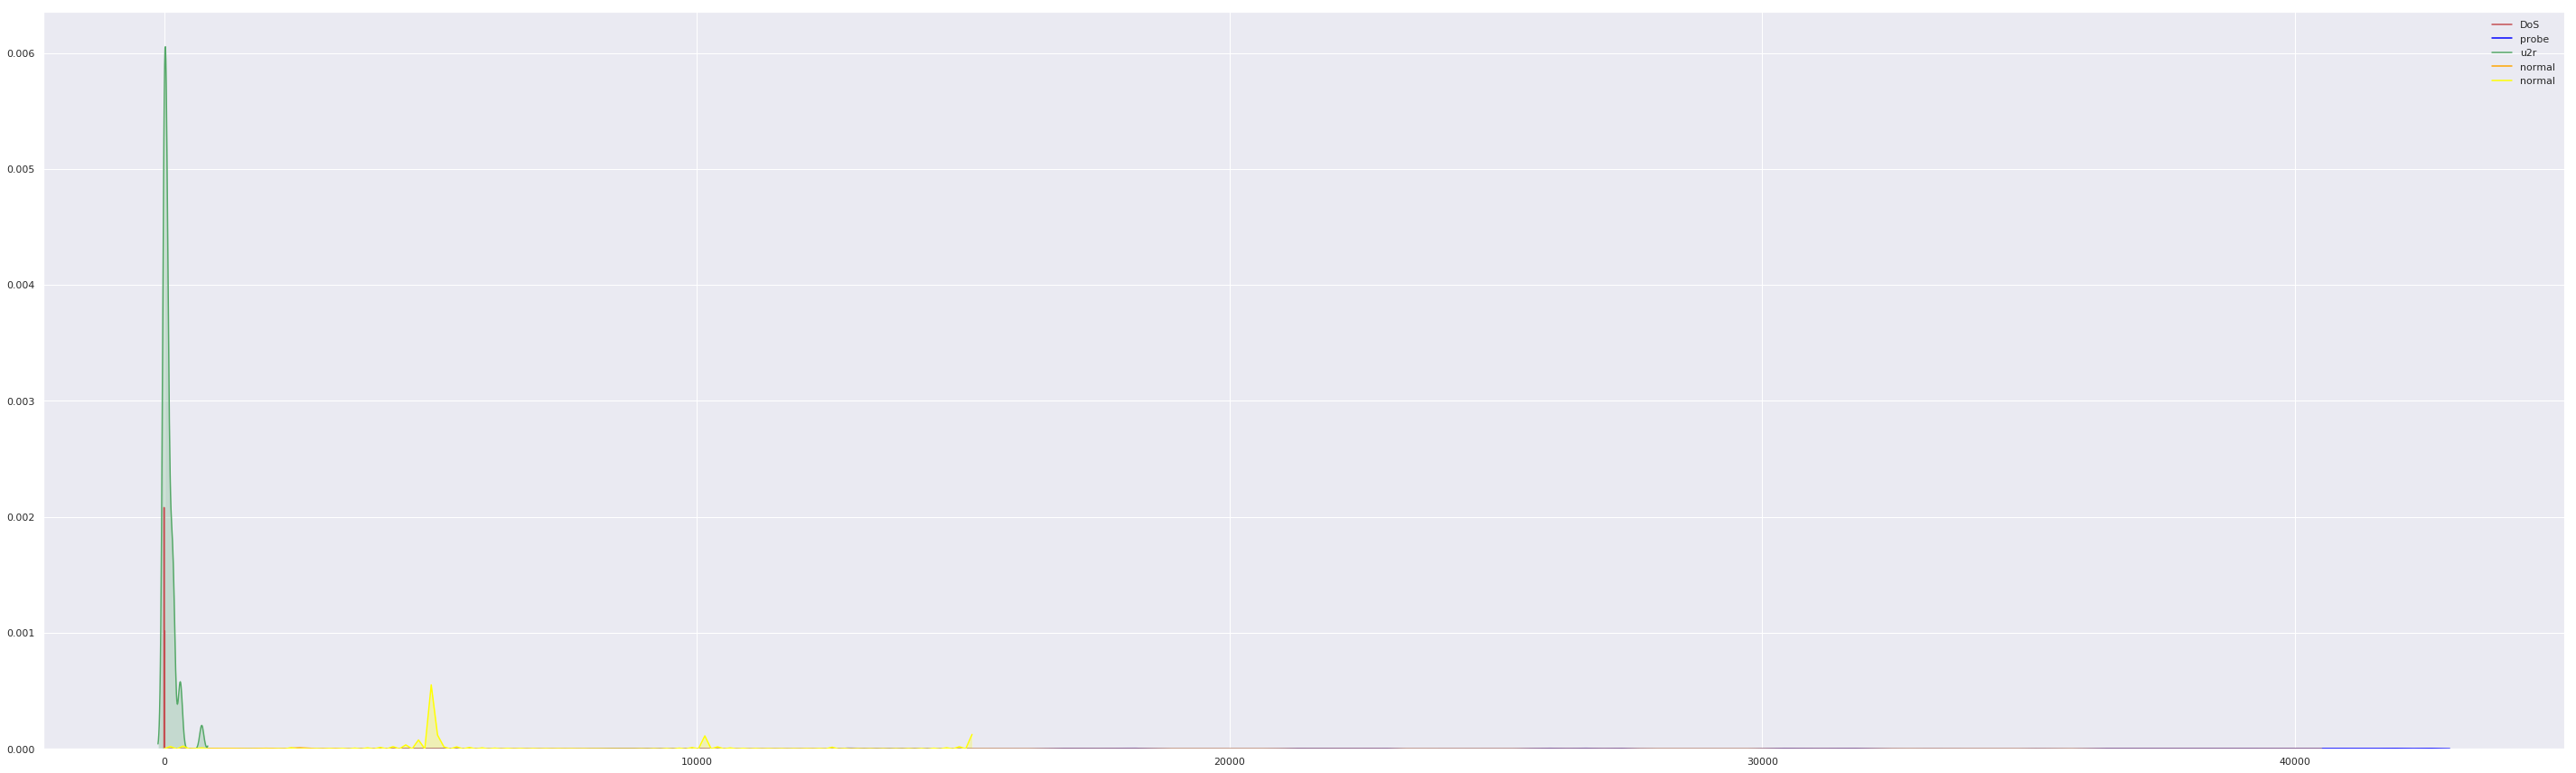

In [0]:
##warning
sns.set(rc={'figure.figsize':(50,15)})

 
# plot of 2 variables
p1=sns.kdeplot(sort_dos_duration['duration'], shade=True,label="DoS", color="r")
p1=sns.kdeplot(sort_probe_duration['duration'], shade=True,label="probe", color="blue")
p1=sns.kdeplot(sort_u2r_duration['duration'], shade=True,label="u2r", color="g")
p1=sns.kdeplot(sort_normal_duration['duration'], shade=True,label="normal", color="orange")
p1=sns.kdeplot(sort_r2l_duration['duration'], shade=True,label="normal", color="yellow")

In [0]:
sort_normal_duration.head()

,duration,type_attack,number
0,0,normal,1
81578,0,normal,81579
81581,0,normal,81582
81582,0,normal,81583
81583,0,normal,81584


In [0]:
# sort_normal_duration.tail(20)
pdf_normal = sort_normal_duration['duration']
pdf_dos = sort_dos_duration['duration']
pdf_probe = sort_probe_duration['duration']
pdf_u2r = sort_u2r_duration['duration']
pdf_r2l = sort_r2l_duration['duration']

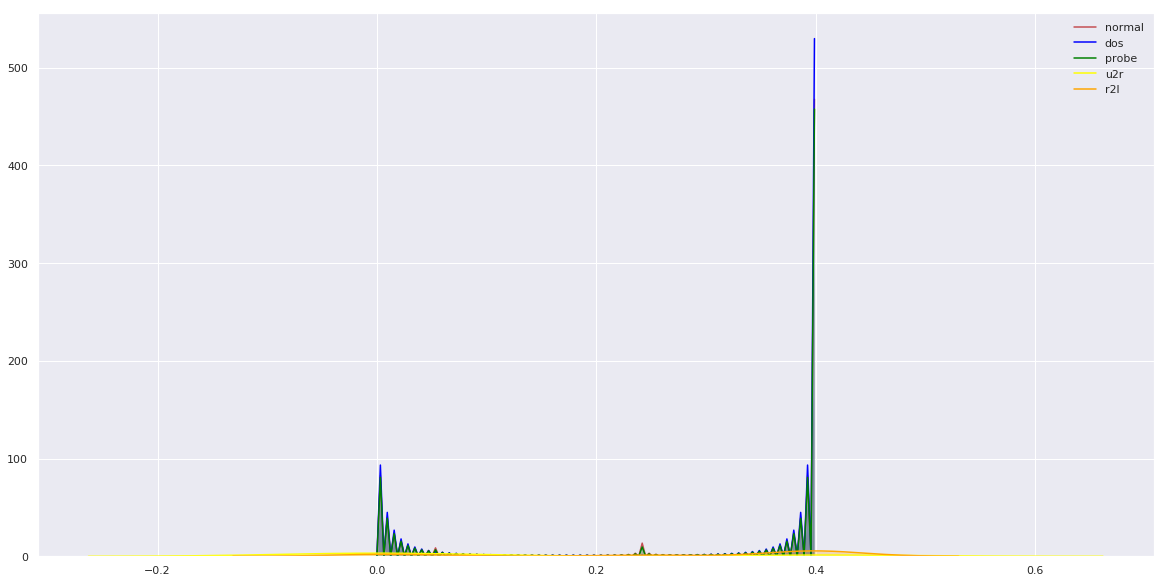

In [0]:
sns.set(rc={'figure.figsize':(20,10)})

 
# plot of 2 variables
p1=sns.kdeplot(norm.pdf(pdf_normal), shade=True,label="normal", color="r")
p1=sns.kdeplot(norm.pdf(pdf_dos), shade=True,label="dos", color="blue")
p1=sns.kdeplot(norm.pdf(pdf_probe), shade=True,label="probe", color="green")
p1=sns.kdeplot(norm.pdf(pdf_u2r), shade=True,label="u2r", color="yellow")
p1=sns.kdeplot(norm.pdf(pdf_r2l), shade=True,label="r2l", color="orange")